**Predicting Forest Fire Areas and Coordinates**

This is a group project by Priya Paul Roll no. A20013 and Mansha Das Roll no. A20012. Here we have taken the dataset from the UCI machine learning repository. We are intended to work with various algorithms. For the time beig we have included KNN, Naive Baise algorithm,XGBoost.

Forest fires importantly influence our environment and lives. The ability of accurately predicting the area that may be involved in a forest fire event may help in optimizing fire management efforts.Forest fires are a major environmental issue, creating economical and ecological damage while endangering human lives. Fast detection is a key element for controlling such phenomenon.This dataset covers meteorological and spatiotemporal data for forest fires (between 2000 and 2003) in Portugal’s Montesinho Natural Park, with 13 attributes each for 517 such incidents. Our target attribute from these 13 is ‘area’ - total burned area in hectares (ha). We also have DMC, DC, ISI and FFMC are components of the Canadian Forest Fire Weather Index (FWI) System, which measures the effects of fuel moisture and wind on fire behavior. These have been calculated using consecutive daily observations of temperature, relative humidity, wind speed, and 24-hour rainfall

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv("forestfires.csv")

In [71]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Checking the datatype so that for the model if we need to change any datatype

In [72]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [73]:
data.isnull()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

 Changing the categorical into interger

In [75]:
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [76]:
data.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

         X    Y  day     FFMC      DMC  ...    temp    RH   wind  rain     area
month                                   ...                                    
1        6    9   13    100.8      4.8  ...    10.5   178    4.0   0.0     0.00
2      103   88   91   1658.1    189.5  ...   192.7  1114   75.1   0.0   125.50
3      255  242  218   4830.0   1865.3  ...   706.5  2160  268.3   0.2   235.26
4       52   38   44    772.1    143.2  ...   108.4   422   42.0   0.0    80.02
5       10    8   11    174.7     53.4  ...    29.3   134    8.9   0.0    38.48
6      107   82   75   1520.3   1587.5  ...   348.4   767   70.3   0.0    99.30
7      167  147  135   2922.5   3532.4  ...   707.5  1444  119.5   0.2   459.83
8      825  788  809  16990.0  28286.8  ...  3980.2  8370  751.9  10.8  2297.99
9      754  708  721  15693.8  20798.7  ...  3373.3  7369  611.9   0.0  3086.13
10      88   65   58   1356.8    621.3  ...   256.4   562   51.9   0.0    99.57
11       6    3    2     79.5      3.0  

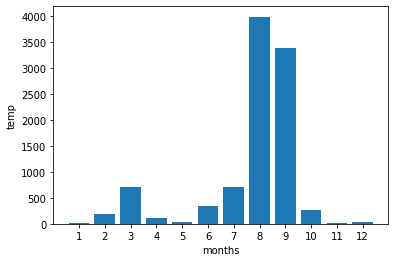

In [77]:
D1= data.groupby('month').sum() 
print(D1)

months = range(1,13)
plt.bar(months, D1['temp'])
plt.xticks(months)
plt.xlabel('months')
plt.ylabel('temp')
plt.show()

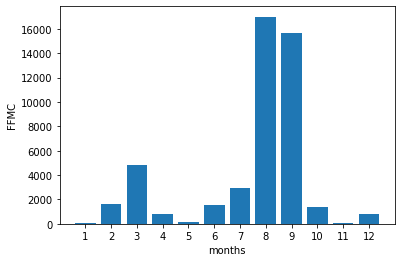

In [78]:
D2= data.groupby('month').sum() 

months = range(1,13)
plt.bar(months, D2['FFMC'])
plt.xticks(months)
plt.xlabel('months')
plt.ylabel('FFMC')
plt.show()


In [79]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split as tts

Since area column is skewed since maximum value are in 0.0 therefore logarithmic transformation has been done

In [80]:
data["area"] = np.log(data["area"]+1)

In [81]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [82]:
data["area"].describe()

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area, dtype: float64

In [83]:
train , test = tts(data, test_size = 0.3)

x_train = train.drop("area",axis=1)
y_train = train["area"]

x_test = test.drop("area",axis=1)
y_test = test["area"]

In [84]:
from sklearn.preprocessing import MinMaxScaler as mm
scaler = mm(feature_range=(0,1))#feature range-0 to 1

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [85]:
iter_len = len(x_test)#length- 0.3(how much data is available)
print(iter_len)

iter_size = round(sqrt(iter_len))#loop test series m ,loops with every data  and it does not  overfit
print(iter_size)
rmse_val_df = pd.DataFrame(columns=["K","Error"])
rmse_val_list = list()

for K in range(iter_size):#k =round(sqrt)
    K=K+1#loop
    model = KNR(n_neighbors=K)#parameters
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
   
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val_list.append(error)
    rmse_val_df = rmse_val_df.append({'K':K,'Error':error},ignore_index=True)
print('the minimum error we get it',min(rmse_val_list))
print("the corresponding minimum K value:", 1+rmse_val_list.index(min(rmse_val_list)))

156
12
the minimum error we get it 1.5008388232498138
the corresponding minimum K value: 12


In [86]:
pred

array([1.42552897, 1.067193  , 1.36827938, 0.94909502, 1.66082609,
       1.52031777, 1.25589417, 1.32563296, 1.73608141, 1.90112234,
       1.28918177, 1.52969288, 1.1575099 , 0.74542155, 1.4095408 ,
       1.31164604, 0.95009741, 0.77472355, 1.62524531, 0.77103896,
       1.80761611, 0.88130418, 0.86669809, 1.23767307, 1.66561714,
       0.46291081, 1.33189098, 0.78538992, 1.1784538 , 1.70726308,
       1.37997174, 0.78944765, 1.63270728, 1.0979675 , 1.25563498,
       0.98424917, 0.85773886, 0.19800147, 1.18570267, 0.5856036 ,
       0.9132166 , 0.94844501, 0.64418577, 0.78909994, 1.60071449,
       0.66001955, 0.5856036 , 0.3966173 , 0.89384419, 1.18549314,
       0.77788605, 1.63173354, 1.51931868, 1.35550644, 1.63948851,
       0.62359824, 1.00473005, 1.19671773, 0.59326492, 1.4974082 ,
       0.63705249, 1.30835771, 1.22594108, 0.73744321, 1.41982719,
       0.41627607, 1.3311172 , 1.46829373, 1.51115187, 1.70389185,
       1.36777511, 1.00446034, 1.54790132, 0.33798387, 0.94384

In [87]:
y_test

423    0.542324
263    0.940007
88     0.000000
513    4.012592
170    1.272566
         ...   
392    4.273327
13     0.000000
86     0.000000
312    0.000000
129    0.000000
Name: area, Length: 156, dtype: float64

If fire area > 0, set the value to 1 and change column name from area to label

In [88]:
data['area'].values[data['area'].values > 0] = 1
data = data.rename(columns={'area': 'label'})

data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=101)

In [90]:
G_NB = GaussianNB()
G_NB.fit(X_train,y_train)
print(G_NB)

# make predictions
predict = G_NB.predict(X_test)

print(metrics.classification_report(y_test, predict))

print(metrics.confusion_matrix(y_test, predict))

print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

         0.0       0.53      0.10      0.17        92
         1.0       0.56      0.93      0.70       115

    accuracy                           0.56       207
   macro avg       0.55      0.51      0.43       207
weighted avg       0.55      0.56      0.46       207

[[  9  83]
 [  8 107]]
Accuracy: 0.5603864734299517
Precision: 0.5631578947368421
Recall: 0.9304347826086956


In [91]:
 classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=G_NB.predict(x_new)
print(classes[y_predict[0]])

On Fire


Applying XGboost

In [92]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(base_score=0.3, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.24, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=102,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [93]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_reg.fit(X_train, y_train, eval_metric=["rmse"],eval_set=eval_set, verbose=False)
preds = xg_reg.predict(X_test)

verbose set to False so that we can hide results of model fit progress

In [94]:
def calc_ISE(X_train, y_train, model):
    '''returns the in-sample R^2 and RMSE; assumes model already fit.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return model.score(X_train, y_train), rmse
    
def calc_OSE(X_test, y_test, model):
    '''returns the out-of-sample R^2 and RMSE; assumes model already fit.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return model.score(X_test, y_test), rmse

Calculate In-Sample and Out-of-Sample R^2 and Error

In [95]:
is_r2, ise = calc_ISE(X_train, y_train,xg_reg )
os_r2, ose = calc_OSE(X_test, y_test, xg_reg)

# show dataset sizes
data_list = (('R^2_in', is_r2), ('R^2_out', os_r2), 
             ('ISE', ise), ('OSE', ose))
for item in data_list:
    print('{:10}: {}'.format(item[0], item[1]))

R^2_in    : 0.09065180753144075
R^2_out   : -0.04918378520444277
ISE       : 0.4767987501212014
OSE       : 0.5089771357751129


Test error(OSE) is near to the training error(ISE). i.e our model is ok.

In [96]:
print('train/test: ',ose/ise)

train/test:  1.0674884018587127


In [97]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.508977
